<a href="https://colab.research.google.com/github/smit585/ReinforcementLearning/blob/master/Optimization_Problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Background 

## Mathematical Formulation in Standard Form

### Nonlinear Programming Problem (NLP): 
A standard problem formulation in numerical optimization

$$min_w  \phi(w)$$   <br>
$s.t:$ <br> 
$$g_1(w) \leq 0$$ 
$$g_2(w) = 0$$


# Optimization Problem 1



> Source: <br>
https://www.youtube.com/watch?v=cXHvC_FGx24


$min(x_1*x_4*(x_1 + x_2 + x_3) + x_3)$

$s.t: $ <br>
$  x_1 + x_2 + x_3 + x_4 \geq 25$ <br>
$ x_1^2 + x_2^2 + x_3^2 + x_4^2 = 40$ <br>
$ 1 \leq x_1, x_2, x_3, x_4 \leq 5$

Initial Guess: 
$ x_0 = (1, 5, 5, 1) $




In [1]:
import numpy as np
from scipy.optimize import minimize

In [2]:
def objective_fun(x):
  x1 = x[0]
  x2 = x[1]
  x3 = x[2]
  x4 = x[3]
  return x1*x4*(x1 + x2 + x3) + x3

In [3]:
# This constraint is an inequality constraint
def constraint1(x):
  return x[0]*x[1]*x[2]*x[3] - 25

In [4]:
# This constraint is an equality constraint
def constraint2(x):
  return 40 - (x[0]**2 + x[1]**2 + x[2]**2+ x[3]**2)

In [5]:
# Bounds for all x is [1, 5]
b= (1, 5)
bounds = (b, b, b, b)

# Initial guess:
x0 = [1, 5, 5, 1]

In [6]:
# Array of constraints
con1 = {'type': 'ineq', 'fun': constraint1}
con2 = {'type': 'eq', 'fun': constraint2}
constraints = [con1, con2]

In [7]:
sol = minimize(objective_fun, x0, method='SLSQP', bounds=bounds, constraints=constraints)

In [8]:
print(sol)

     fun: 17.01401724556073
     jac: array([14.57227039,  1.37940764,  2.37940764,  9.56415081])
 message: 'Optimization terminated successfully.'
    nfev: 30
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([1.        , 4.74299607, 3.82115466, 1.37940764])


> Source problems 2-4: <br>
https://www.youtube.com/watch?v=RrnkPrcpyEA&t=4348s



# Optimization Problem 2

Find the local minimum of the following function:
**$ \phi(w) = w^2 - 6w + 13$**

Optimization Problem

$$ min (w^2 - 6w + 13)$$

This can be solved analytically too: <br>
$$\frac{d\phi(w)}{dw} = 2w - 6$$
$$w = 3$$

Text(0.5, 1.0, 'Cost Function')

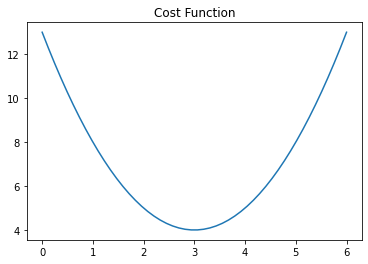

In [9]:
import matplotlib.pyplot as plt

x = np.linspace(0, 6, num=50)

y = np.zeros(x.size)
for i in range(x.size):
  y[i] = x[i]**2 - 6*x[i] + 13

plt.plot(x, y)
plt.title('Cost Function')

Optimization Problem

$$ min (w^2 - 6w + 13)$$

Unconstrained and boundless problem

Initial Guess = -0.5

In [10]:
def obf2(w):
  return w**2 - 6*w + 13

In [11]:
sol = minimize(obf2, x0=-0.5, method='SLSQP')

In [12]:
print(sol)

     fun: 4.0
     jac: array([0.])
 message: 'Optimization terminated successfully.'
    nfev: 7
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([3.])


# Optimization Problem 3

$$min_w (\mathrm{e}^{0.2w}*sin(w))$$

$s.t.$
$$w \geq 0$$
$$w \leq 4\pi$$ 

Initial Guess:
$$x_0 = 10$$

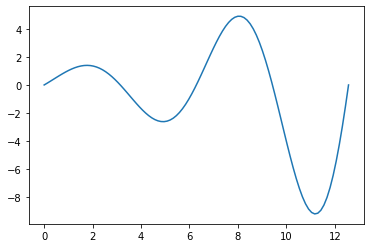

In [13]:
import math
import matplotlib.pyplot as plt

w = np.linspace(0, 4*np.pi, num=100)
y = np.zeros(w.size)
for i in range(w.size):
  y[i] = math.exp(0.2*w[i])*np.sin(w[i])

plt.plot(w, y)

We see that there are two minimum of this function in $[0, 4\pi]$ <br>
$0$ is also a local minimum here as in the range its neighbourhood only increases in value.

Therefore initial guess is important for us otherwise we will be stuck at a local minimum instead

In [14]:
def ob3(w):
  return math.exp(0.2*w)*np.sin(w)

In [15]:
bounds = [(0, 4*np.pi)]
x0 = [10]

In [16]:
# Change the initial x0, sol.x will change accordingly
# x0 = 1; sol.x = 0
# x0 = 4; sol.x = 4.9098
# x0 = 10;sol.x = 11.1929
sol = minimize(ob3, x0=10, method='SLSQP', bounds=bounds)

In [17]:
print(sol)

     fun: -9.197977391818991
     jac: array([-0.00055301])
 message: 'Optimization terminated successfully.'
    nfev: 16
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([11.19291205])


# Optimization Problem 4

This is a linear regression problem. For the following set of data points, 
fit a straight line of the form

$$y = mx + c$$

*   Here, we minimize the sum of squared errors, between the line and the data points (Least Squares) 
*   Two optimization variables (m and c)

Objective Function:

$$\phi(m, c) = \sum_{i=1}^{n_{data}}(y(i)- (m.x(i) + c))^2$$

$$min_{m,c}(\phi(m, c))$$


Initial Guess:
$$m = 0.5, c = 1$$ 



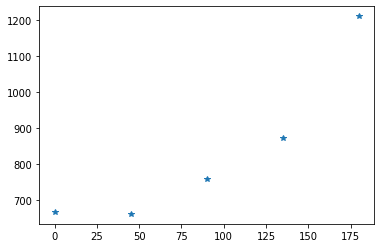

In [18]:
import matplotlib.pyplot as plt

x = np.array([0, 45, 90, 135, 180])
y = np.array([667, 661, 757, 871, 1210])

plt.plot(x, y, '*')

This is the data that we have, we need to find the equation of the line that minimizes the least square errors of all the points

In [19]:
def obj4(w):
  obj = 0
  m = w[0]
  c = w[1]
  for i in range(x.size):
    obj += (y[i] - (m*x[i] + c))**2

  return obj

In [20]:
x0 = [0.5, 1]

In [21]:
sol = minimize(obj4, x0, method='SLSQP')

In [22]:
print(sol)

     fun: 38527.20000000125
     jac: array([ 0.        , -0.00048828])
 message: 'Optimization terminated successfully.'
    nfev: 26
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([  2.88000019, 573.99997274])


In [23]:
slope = sol.x[0]
interc = sol.x[1]

point1_x = 0
point1_y = interc

point2_x = 180
point2_y = slope*point2_x + interc

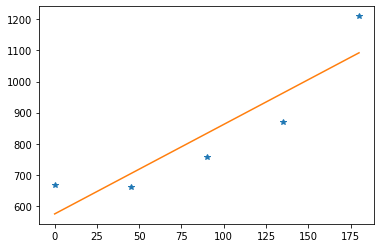

In [24]:
plt.plot(x, y, '*')
plt.plot([point1_x, point2_x], [point1_y, point2_y])

Thus, the line with the given slope and intercept provides the least squared sum for the given data points.

> Source problem: <br>
https://www.youtube.com/watch?v=M7ZA9fq2zCE

# Optimization Problem 5

Objective Function:

$$min(x_1^2 + x_1*x_2)$$
$s.t.$

$$x_1^3 + x_1*x_2 = 100$$
$$x_1^3 + x_1*x_2 \geq 50$$

$$-100 \leq x_1, x_2 \leq 100$$

Initial Value:
$$x0 = [1, 1]$$


In [25]:
def obj5(x):
  x1 = x[0]
  x2 = x[1]

  return x1**2 + x1*x2

In [26]:
def equality_constraint(x):
  x1 = x[0]
  x2 = x[1]

  return 100 - (x1**3 + x1*x2)


In [27]:
def inequality_constraint(x):
  x1 = x[0]
  x2 = x[1]

  return x1*3 + x1*x2 - 50 

In [28]:
b = (-100, 100)
bounds = (b, b)

constraint1 = {'type' : 'eq', 'fun': equality_constraint}
constraint2 = {'type' : 'ineq', 'fun': inequality_constraint}

constraints = (constraint1, constraint2)

x0 = [1, 1]

In [29]:
sol = minimize(obj5, x0, method='SLSQP', bounds=bounds, constraints=constraints)

In [30]:
print(sol)

     fun: 53.77711343103649
     jac: array([17.55220366,  3.95501804])
 message: 'Optimization terminated successfully.'
    nfev: 25
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([3.95501801, 9.64216746])




> Source <br>
https://youtu.be/RrnkPrcpyEA?t=2546

# Optimization Problem : MPC
### Pretext: 

For a differential drive robot:

System state vector in inertial frame: 

\begin{equation}
\mathbf{x} = \begin{bmatrix} x & y & \theta \end{bmatrix}^T 
\end{equation}

<br>

Posture rate as a function of the right and left wheels speed

\begin{equation}
\begin{bmatrix} \dot{x} \\ \dot{y} \\ \dot{\theta} \end{bmatrix} = \frac{r}{2}\begin{bmatrix} 
(\dot{\phi_r} + \dot{\phi_l})\cos \theta \\ 
(\dot{\phi_r} + \dot{\phi_l})\sin \theta \\
(\dot{\phi_r} - \dot{\phi_l})/D
\end{bmatrix}
\end{equation}

<br>

Linear and angular velocities of the robot

\begin{equation}
\begin{bmatrix} v \\ \omega \end{bmatrix} = \frac{r}{2}
\begin{bmatrix} 
(\dot{\phi_r} + \dot{\phi_l}) \\ 
(\dot{\phi_r} - \dot{\phi_l})/D
\end{bmatrix}
\end{equation}

<br>

Combining our two matrices, we get poses as a function of robots linear velocity and angular velocity

\begin{equation}
\begin{bmatrix} \dot{x} \\ \dot{y} \\ \dot{\theta} \end{bmatrix} = 
\begin{bmatrix}
vcos\theta \\
vsin\theta \\
\omega
\end{bmatrix} = 
\begin{bmatrix}
cos\theta & 0 \\
sin\theta & 0 \\
0 & 1
\end{bmatrix}*
\begin{bmatrix}
v \\
\omega
\end{bmatrix}
\end{equation}

These are our non-holonomic constraints



## System Model

$$\dot{x(t)} = f_c(x(t), \; u(t)) $$

<br>

\begin{equation}
\begin{bmatrix} \dot{x} \\ \dot{y} \\ \dot{\theta} \end{bmatrix} = 
\begin{bmatrix}
vcos\theta \\
vsin\theta \\
\omega
\end{bmatrix}
\end{equation}
<br>
This can be written in discrete form by Euler Discretization
<br>
$$x(k+1) = f(x(k), \; u(k))$$

<br>

At sample time $\Delta T$

\begin{equation}
\begin{bmatrix} x(k+1) \\ y(k+1) \\ \theta(k+1) \end{bmatrix} = 
\begin{bmatrix}
x(k) \\
y(k) \\
\theta(k)
\end{bmatrix} + \Delta T
\begin{bmatrix}
v(k)cos\theta(k) \\
v(k)sin\theta(k) \\
\omega(k)
\end{bmatrix}
\end{equation}

## MPC Controller

Running Costs:

$$\mathrm{l}(\mathbf{x}, \mathbf{u}) = 
\begin{Vmatrix}
\mathbf{x}_u - \mathbf{x}^{ref}
\end{Vmatrix}^2_Q + 
\begin{Vmatrix}
\mathbf{u} - \mathbf{u}^{ref}
\end{Vmatrix}^2_R$$



## Optimal Control Problem (OCP):

$$min \; J_n(\mathbf{x}_0, \mathbf{u}) = \sum_{k=0}^{N-1} \mathrm{l}(\mathbf{x}_u(k), \mathbf{u}(k))$$

<br>

Subject To:

$$\mathbf{x}_u(k+1) = f(x_u(k), \; u(k)),$$
$$\mathbf{x}_u(0) = \mathbf{x}_0$$
\begin{equation}
\mathbf{u}(k) \in \mathit{U} \quad \forall k \in [0, N-1]
\end{equation}
\begin{equation}
\mathbf{x}_u(k) \in \mathit{X} \quad \forall k \in [0, N]
\end{equation}

## We need to convert the OCP into NLP

For that we will use Single Shooting method

In [31]:
import numpy as np
import sympy as sym
from sympy import MatrixSymbol, Matrix
from scipy.optimize import minimize

# Sampling Time
T = 0.2
# Prediction Horizon
#N = 3
N = 8
# Prediction Time will be T*N seconds

# Control Constraints
v_max = 0.6
v_min = -v_max

omega_max = np.pi/4
omega_min = - omega_max

# For our model we have 3 states
x = sym.symbols('x')
y = sym.symbols('y')
theta = sym.symbols('theta')

states = np.array([x, y, theta])
n_states = states.size

# And two control actions
v = sym.symbols('v')
omega = sym.symbols('omega')
controls = np.array([v, omega])
n_controls = controls.size

# RHS of our System Model:
rhs = np.array([v*sym.cos(theta), v*sym.sin(theta), omega])

# This is our function that takes in the control and states
# and give out value of rhs
f = sym.lambdify((states, controls), rhs, 'numpy')

# Following vals return rhs = [1, 0, 1].T
#states_val = np.array([[0], [0], [0]])
#controls_val = np.array([[1],[1]])
#print(f(states_val, controls_val))

In [32]:
print("States= \n")
Matrix(states)

States= 



Matrix([
[    x],
[    y],
[theta]])

In [33]:
print("Controls= \n")
Matrix(controls)

Controls= 



Matrix([
[    v],
[omega]])

In [34]:
    def create_array_of_symbols(str_symbol, N):
      symbol_array = sym.symbols('{symbol}0:{N}'.format(symbol=str_symbol, N=N))
      symbol_array = np.asarray(symbol_array)
      return symbol_array


### We will create U Variable now

U has all the optimization variables for this problem. It is an array of $n_{controls}*N$ variables.

For this variables as we have $n_{controls} = 2 \implies (v, \omega)$

We will have the array of type:

\begin{equation}
\mathit{U} = 
\begin{bmatrix}
\mathbf{u_0 \\ u_1 \\ \vdots \\ u_{N-1}}
\end{bmatrix} = 
\begin{bmatrix}
v_0 \\ \omega_0 \\ \vdots \\ v_{N-1} \\ \omega_{N-1}
\end{bmatrix} 
\end{equation}

In [35]:
U = create_array_of_symbols('U', n_controls * N)
#U = create_symbol_matrix('U', n_controls * N)
Matrix(U)

Matrix([
[ U0],
[ U1],
[ U2],
[ U3],
[ U4],
[ U5],
[ U6],
[ U7],
[ U8],
[ U9],
[U10],
[U11],
[U12],
[U13],
[U14],
[U15]])

In the above print statement, for Prediction Horizon N = 3 and $n_{controls} = 2$

\begin{equation}
U0 \implies v_0 \\
U1 \implies \omega_0
\\
U2 \implies v_1 \\
U3 \implies \omega_1
\\
U4 \implies v_2 \\
U5 \implies \omega_2
\end{equation}

That is 2 control actions for each step

### Now we will create Parameters Vector P

This vector will be of size = $n_{states}*2$
where first $P[0 \dots n_{states}-1]$ will contain the initial state of the robot at that time step and $P[n_{states} \dots 2*n_{states}-1]$ will contain the reference state of the robot 

In [36]:
P = create_array_of_symbols('P', n_states * 2)
#P = create_symbol_matrix('P', n_states * 2)
Matrix(P)

Matrix([
[P0],
[P1],
[P2],
[P3],
[P4],
[P5]])

Here P0, P1, P2 represent the initial values of $x, y, \theta$ at the time step 
whereas P3, P4, P5 represents the reference values we are trying to achieve $x_r, y_r, \theta_r$

### Matrix X

Represents the states over the optimization problem at each time step.
The value at each sim step will be stored in this Matrix X

Our matrix X is of the form 
\begin{equation}
X_{m, n} = 
 \begin{bmatrix}
  x_{1} & x_{2} & \cdots & x_{n} \\
  v_{1} & v_{2} & \cdots & v_{n} \\
  \theta_{1} & \theta_{2} & \cdots & \theta_{n} 
 \end{bmatrix}
 \end{equation}

<br>
 Where $m =$ number of states  $n =$  Number of Prediction Steps + 1

 In this Matrix, Column 1 is the initial state of the robot, and following columns would be filled with the MPC predictions
 

In [37]:
X = np.full((n_states, N+1), None)

# Get the initial values from P matrix
X[:, 0] = np.array(P[0:3])

for k in range(1, N+1):
  # Previous States
  prevState = X[:, k-1]
  prevX = prevState[0]
  prevY = prevState[1]
  prevAngle = prevState[2]
  
  # Control Inputs
  prevV = U[2*(k-1)]
  prevW = U[2*(k-1) + 1]

  # Update the X value of the state
  X[0, k] = prevX + T*prevV*sym.cos(prevAngle)
  # Update the Y value of the state
  X[1, k] = prevY + T*prevV*sym.sin(prevAngle)
  # Update the Angle value of the state
  X[2, k] = prevAngle + T*prevW

# This function is used get the optimal trajectory
# knowing the optimal solution
plant_model = sym.lambdify((U, P), X, 'numpy')

Matrix(X)

Matrix([
[P0, P0 + 0.2*U0*cos(P2), P0 + 0.2*U0*cos(P2) + 0.2*U2*cos(P2 + 0.2*U1), P0 + 0.2*U0*cos(P2) + 0.2*U2*cos(P2 + 0.2*U1) + 0.2*U4*cos(P2 + 0.2*U1 + 0.2*U3), P0 + 0.2*U0*cos(P2) + 0.2*U2*cos(P2 + 0.2*U1) + 0.2*U4*cos(P2 + 0.2*U1 + 0.2*U3) + 0.2*U6*cos(P2 + 0.2*U1 + 0.2*U3 + 0.2*U5), P0 + 0.2*U0*cos(P2) + 0.2*U2*cos(P2 + 0.2*U1) + 0.2*U4*cos(P2 + 0.2*U1 + 0.2*U3) + 0.2*U6*cos(P2 + 0.2*U1 + 0.2*U3 + 0.2*U5) + 0.2*U8*cos(P2 + 0.2*U1 + 0.2*U3 + 0.2*U5 + 0.2*U7), P0 + 0.2*U0*cos(P2) + 0.2*U10*cos(P2 + 0.2*U1 + 0.2*U3 + 0.2*U5 + 0.2*U7 + 0.2*U9) + 0.2*U2*cos(P2 + 0.2*U1) + 0.2*U4*cos(P2 + 0.2*U1 + 0.2*U3) + 0.2*U6*cos(P2 + 0.2*U1 + 0.2*U3 + 0.2*U5) + 0.2*U8*cos(P2 + 0.2*U1 + 0.2*U3 + 0.2*U5 + 0.2*U7), P0 + 0.2*U0*cos(P2) + 0.2*U10*cos(P2 + 0.2*U1 + 0.2*U3 + 0.2*U5 + 0.2*U7 + 0.2*U9) + 0.2*U12*cos(P2 + 0.2*U1 + 0.2*U11 + 0.2*U3 + 0.2*U5 + 0.2*U7 + 0.2*U9) + 0.2*U2*cos(P2 + 0.2*U1) + 0.2*U4*cos(P2 + 0.2*U1 + 0.2*U3) + 0.2*U6*cos(P2 + 0.2*U1 + 0.2*U3 + 0.2*U5) + 0.2*U8*cos(P2 + 0.2*U1 + 0

### Q and R Parameters

Q and R are the standard tuning parameters in the optimal controls

In [38]:
Q = np.zeros((n_states, n_states))
Q[0, 0] = 5
Q[1, 1] = 5
Q[2, 2] = 0.1

print("Q =")
print(Q)
print(" ")
R = np.zeros((n_controls,n_controls))
R[0, 0] = 5
R[1, 1] = 0.05

print("R =")
print(R)

Q =
[[5.  0.  0. ]
 [0.  5.  0. ]
 [0.  0.  0.1]]
 
R =
[[5.   0.  ]
 [0.   0.05]]


These can be used to tune the controller

### Objective Function

$$\mathrm{l}(\mathbf{x}, \mathbf{u}) = 
\begin{Vmatrix}
\mathbf{x}_u - \mathbf{x}^{ref}
\end{Vmatrix}^2_Q + 
\begin{Vmatrix}
\mathbf{u} - \mathbf{u}^{ref}
\end{Vmatrix}^2_R$$


$$min \; J_n(\mathbf{x}_0, \mathbf{u}) = \sum_{k=0}^{N-1} \mathrm{l}(\mathbf{x}_u(k), \mathbf{u}(k))$$


In [39]:
obj = 0

for k in range(N):
  # State of the robot at this prediction step
  st = X[:, k]

  # P matrix contains reference position 
  # from position 3 to end
  d_state_ref = (st - P[3:6])

  # Converting the array into column matrix
  d_state_ref = d_state_ref[..., None]
  con = np.array([[U[2*k]], [U[2*k + 1]]])

  # Add all the cost values for the changes in state and 
  # control to the objective cost
  obj += (d_state_ref.T@Q@d_state_ref + con.T@R@con)

Matrix(obj)

Matrix([[5.0*U0**2 + 0.05*U1**2 + 5.0*U10**2 + 0.05*U11**2 + 5.0*U12**2 + 0.05*U13**2 + 5.0*U14**2 + 0.05*U15**2 + 5.0*U2**2 + 0.05*U3**2 + 5.0*U4**2 + 0.05*U5**2 + 5.0*U6**2 + 0.05*U7**2 + 5.0*U8**2 + 0.05*U9**2 + (P0 - P3)*(5.0*P0 - 5.0*P3) + (P1 - P4)*(5.0*P1 - 5.0*P4) + (0.1*P2 - 0.1*P5)*(P2 - P5) + (P0 - P3 + 0.2*U0*cos(P2))*(5.0*P0 - 5.0*P3 + 1.0*U0*cos(P2)) + (P1 - P4 + 0.2*U0*sin(P2))*(5.0*P1 - 5.0*P4 + 1.0*U0*sin(P2)) + (0.1*P2 - 0.1*P5 + 0.02*U1)*(P2 - P5 + 0.2*U1) + (P0 - P3 + 0.2*U0*cos(P2) + 0.2*U2*cos(P2 + 0.2*U1))*(5.0*P0 - 5.0*P3 + 1.0*U0*cos(P2) + 1.0*U2*cos(P2 + 0.2*U1)) + (P1 - P4 + 0.2*U0*sin(P2) + 0.2*U2*sin(P2 + 0.2*U1))*(5.0*P1 - 5.0*P4 + 1.0*U0*sin(P2) + 1.0*U2*sin(P2 + 0.2*U1)) + (0.1*P2 - 0.1*P5 + 0.02*U1 + 0.02*U3)*(P2 - P5 + 0.2*U1 + 0.2*U3) + (P0 - P3 + 0.2*U0*cos(P2) + 0.2*U2*cos(P2 + 0.2*U1) + 0.2*U4*cos(P2 + 0.2*U1 + 0.2*U3))*(5.0*P0 - 5.0*P3 + 1.0*U0*cos(P2) + 1.0*U2*cos(P2 + 0.2*U1) + 1.0*U4*cos(P2 + 0.2*U1 + 0.2*U3)) + (P1 - P4 + 0.2*U0*sin(P2) + 0.2*

In [40]:
fObj = sym.lambdify((U, P), obj, 'numpy')

## Constraints

### Constraint Symbols

For robot to be in the map, we need to make sure its x and y values are constrained.
Therefore for all the predictions, we would need to make sure that x and y are bounded.
All the x and y values, starting from the initial state to the final prediction must go here

In [42]:
g = []
# From initial stage to last prediction,
# all the variables must be in the bounded region
for k in range(N+1):
  g.append(X[0, k]) # Add state x for kth step
  g.append(X[1, k]) # Add state y for kth step

g = np.asarray(g)

#Matrix(g)

#### All these symbols above should be in the constraints

Note. The matrix becomes large as value of N increases, to view the Matrix please uncomment the last code piece


### Constraints

In [43]:
# These are the constraints that our state vector should be within
# These bounds should be manipulated
bxy= (-2, 2)
bAngle = (-np.inf, np.inf)
bounds = (bxy, bxy, bAngle)

v_max = 5
v_min = -v_max

v_bounds = (v_min, v_max)

omega_max = np.pi/4
omega_min = - omega_max

omega_bounds = (omega_min, omega_max)

# These are the constraints that our control variables should be within
# for all the N time step horizons
u_bounds = (v_bounds, omega_bounds)*N

## Simulation starts from here!

In [44]:
# Initial State
x0 = np.zeros_like(states)

# Reference State (What we wanna achieve)
xs = np.array([25, 12, 3*np.pi/2])
x0 = np.zeros_like(xs)

# This will contain the history of states 
state_i = []
state_i.append(x0)

predict_info = []

# Initialization of Control inputs
u0 = np.zeros_like(U)
applied_control = u0[0:n_controls]

# Max sim time of 20 
sim_time = 40

#start MPC
mpciter = 0
u_cl = []
u_cl.append(applied_control)

# Parameters array
p = np.zeros_like(P)

p[3:6] = xs  # Add reference state of the robot
# The reference state of robot would not change


while np.linalg.norm(x0 - xs) > 1e-2 and mpciter < sim_time/T:
  if mpciter % 10 == 0:
    print(mpciter)
  p[0:3] = x0  # Add initial state of the robot

  # Given cost, current state and current controls,
  # the solver gives out the optimal control needed
  U_solution = minimize(fObj, u0, args=p, method='SLSQP', bounds=u_bounds)

  # This is the optimal control values
  u = U_solution.x

  # This is the sequence of trajectory that will 
  # is predicted by the optimal control, starting
  # from initial state to the state reached in 
  # time horizon steps
  trajectory = plant_model(u, p)
  predict_info += [trajectory]

  # We will take out the first predicted
  # control from the optimal controls
  applied_control = u[0:n_controls]
  u_cl.append(applied_control)

  # Get the new state of robot
  dstate = f(x0, applied_control)
  dstate = np.asarray(dstate)

  x0 = x0 + T*dstate
  state_i.append(x0)

  # We will use the optimal control
  # of previous step for next 
  # prediction
  u0 = u[n_controls:]
  u0 = np.append(u0, applied_control)

  mpciter += 1


# Final state of the robot
print(x0)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
[24.95331875 11.99994787  4.71338096]


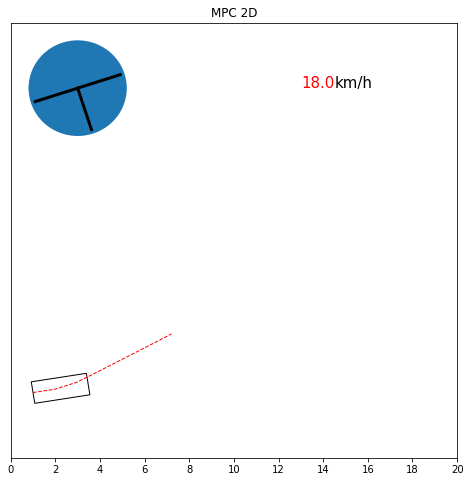

In [45]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from matplotlib import rc
rc('animation', html='jshtml')

###################
# SIMULATOR DISPLAY

options = {}
options['FIG_SIZE'] = [8, 8]
options['OBSTACLES'] = False

# Simulator Options
FIG_SIZE = options['FIG_SIZE'] # [Width, Height]
OBSTACLES = options['OBSTACLES']

# Total Figure
fig = plt.figure(figsize=(FIG_SIZE[0], FIG_SIZE[1]))
gs = gridspec.GridSpec(8,8)

# Elevator plot settings.
ax = fig.add_subplot(gs[:8, :8])

ax.set_ylim(-3, 17)
plt.xticks(np.arange(0,90, step=2))
plt.xlim(0, 20)
plt.yticks([])
plt.title('MPC 2D')

# Main plot info.
car_width = 1.0
patch_car = mpatches.Rectangle((0, 0), car_width, 2.5, fc='k', fill=False)
patch_goal = mpatches.Rectangle((0, 0), car_width, 2.5, fc='b',
                                ls='dashdot', fill=False)

ax.add_patch(patch_car)
ax.add_patch(patch_goal)
predict, = ax.plot([], [], 'r--', linewidth = 1)

# Car steering and throttle position.
telem = [6,14]
patch_wheel = mpatches.Circle((telem[0]-3, telem[1]), 2.2)
ax.add_patch(patch_wheel)
wheel_1, = ax.plot([], [], 'k', linewidth = 3)
wheel_2, = ax.plot([], [], 'k', linewidth = 3)
wheel_3, = ax.plot([], [], 'k', linewidth = 3)

# Speed Indicator
speed_text = ax.text(telem[0]+7, telem[1], '0', fontsize=15)
speed_units_text = ax.text(telem[0]+8.5, telem[1], 'km/h', fontsize=15)

# Shift xy, centered on rear of car to rear left corner of car.
def car_patch_pos(x, y, psi):
    x_new = x - np.sin(psi)*(car_width/2)
    y_new = y + np.cos(psi)*(car_width/2)
    return [x_new, y_new]

patch_goal.set_xy(car_patch_pos(xs[0],xs[1],xs[2]))
patch_goal.angle = np.rad2deg(xs[2])-90

def steering_wheel(wheel_angle):
    wheel_1.set_data([telem[0]-3, telem[0]-3+np.cos(wheel_angle)*2],
                      [telem[1], telem[1]+np.sin(wheel_angle)*2])
    wheel_2.set_data([telem[0]-3, telem[0]-3-np.cos(wheel_angle)*2],
                      [telem[1], telem[1]-np.sin(wheel_angle)*2])
    wheel_3.set_data([telem[0]-3, telem[0]-3+np.sin(wheel_angle)*2],
                      [telem[1], telem[1]-np.cos(wheel_angle)*2])
    #brake_text.set_x(telem[0]+3)
    #throttle_text.set_x(telem[0])
    patch_wheel.center = telem[0]-3, telem[1]
    speed_text.set_x(telem[0]+7)
    speed_units_text.set_x(telem[0]+8.5)

def update_plot(num):
    # Car.
    patch_car.set_xy(car_patch_pos(state_i[num][0], state_i[num][1], state_i[num][2]))
    patch_car.angle = np.rad2deg(state_i[num][2])-90
    # Car wheels
    steering_wheel(state_i[num][2]*2)
    #throttle.set_data([telem[0],telem[0]],
    #                [telem[1]-2, telem[1]-2+max(0,u_i[num,0]/1*4)])
    #brake.set_data([telem[0]+3, telem[0]+3],
    #                [telem[1]-2, telem[1]-2+max(0,-u_i[num,0]/1*4)])

    speed = u_cl[num][0]*3.6
    speed_text.set_text(str(round(speed,1)))
    if speed > 10.1:
        speed_text.set_color('r')
    else:
        speed_text.set_color('k')

    #print(str(state_i[num,3]))
    try:
      predict.set_data(predict_info[num][0],predict_info[num][1])
    except IndexError:
      pass
    # Timer.
    #time_text.set_text(str(100-t[num]))
    if (state_i[num][0] > 5):
        ax.set_xlim(state_i[num][0]-5, state_i[num][0]+15)
        telem[0] = state_i[num][0]+1


    return patch_car

car_ani = animation.FuncAnimation(fig, update_plot, frames=range(1,len(state_i)), interval=100, repeat=True, blit=False)

In [46]:
car_ani